# Given a dataset of 10 years having top 10 US stock names. Create a function that will take 2 parameters as input - Metric and Range.
# Metrics are EBIT NTM, Sales NTM, EBITDA NTM, Tax Rate NTM, Gross Margin NTM ( grossIncNtm/salesNtm ) and range must be an integer which specifies the months to roll. Calculate rolling correlation for 12 Month Price Change versus 12 Month Metric Change. Plot the chart for average rolling correlation across stocks over time, so a single line showing average correlation across all ten stocks over time. Avoid loops.

In [10]:
#Saved the dataset to a repo and using wget to avoid manual uoload
!wget   https://github.com/rahul23aug/Datascience_Projects/raw/master/Dataset.xlsx

--2021-10-29 06:34:57--  https://github.com/rahul23aug/Datascience_Projects/raw/master/Dataset.xlsx
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rahul23aug/Datascience_Projects/master/Dataset.xlsx [following]
--2021-10-29 06:34:57--  https://raw.githubusercontent.com/rahul23aug/Datascience_Projects/master/Dataset.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108796 (106K) [application/octet-stream]
Saving to: ‘Dataset.xlsx.1’

Dataset.xlsx.1      100%[===================>] 106.25K  --.-KB/s    in 0.02s   

2021-10-29 06:34:57 (5.09 MB/s) - ‘Dataset.xlsx.1’ saved [108796/108796]



In [11]:
#Import necessary librariey
import numpy as np, pandas as pd, matplotlib.pyplot as plt,seaborn as sns
#Supress warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
sns.set()

In [12]:
#Read xlsx to dataframe
price_df = pd.read_excel('Dataset.xlsx')
metric_df = pd.read_excel('Dataset.xlsx', sheet_name=1)

In [4]:
price_df

,ticker_exchange,date,price
0,AAPL-USA,2021-02-28,121.2600
1,AAPL-USA,2021-03-31,122.1500
2,AAPL-USA,2021-05-31,124.6100
3,AAPL-USA,2021-01-31,131.9600
4,AAPL-USA,2013-01-31,16.2675
...,...,...,...
1077,V-USA,2013-01-31,39.4775
1078,V-USA,2012-12-31,37.8950
1079,V-USA,2013-05-31,44.5350
1080,V-USA,2018-12-31,131.9400


In [ ]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ticker_exchange  1082 non-null   object        
 1   date             1082 non-null   datetime64[ns]
 2   price            1082 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.5+ KB


In [6]:
metric_df

,ticker_exchange,date,ebit_ntm,sales_ntm,ebitda_ntm,tax_rate,gross_inc_ntm
0,AAPL-USA,2021-02-28,89491.2000,338848.250,99831.0600,0.161523,134686.480
1,AAPL-USA,2021-03-31,89844.3700,340721.000,100759.1800,0.161685,135312.340
2,AAPL-USA,2021-05-31,100966.9900,362602.200,111895.0700,0.154499,147911.340
3,AAPL-USA,2021-01-31,88695.9000,335770.060,99486.6600,0.160802,133558.270
4,AAPL-USA,2013-01-31,58193.3550,190675.530,64139.4140,NaN,74128.016
...,...,...,...,...,...,...,...
1077,V-USA,2013-01-31,7354.5510,11993.755,7716.7640,NaN,14670.228
1078,V-USA,2012-12-31,7262.7583,11874.104,7631.5327,NaN,14539.194
1079,V-USA,2013-05-31,7766.8880,12572.116,8178.6387,NaN,NaN
1080,V-USA,2018-12-31,15992.8990,23506.838,16632.3730,0.202647,NaN


In [7]:
metric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ticker_exchange  1082 non-null   object        
 1   date             1082 non-null   datetime64[ns]
 2   ebit_ntm         1043 non-null   float64       
 3   sales_ntm        1070 non-null   float64       
 4   ebitda_ntm       987 non-null    float64       
 5   tax_rate         863 non-null    float64       
 6   gross_inc_ntm    909 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 59.3+ KB


In [ ]:
price_df.describe()

,price
count,1082.000000
mean,26838.978466
std,79249.146491
min,3.938000
25%,41.299250
50%,106.170000
75%,592.994150
max,436000.000000


In [13]:
temp = metric_df.groupby(by = 'ticker_exchange', axis = 0)
temp.get_group('BABAF-USA')

,ticker_exchange,date,ebit_ntm,sales_ntm,ebitda_ntm,tax_rate,gross_inc_ntm
242,BABAF-USA,2021-05-31,NaN,NaN,NaN,NaN,NaN
243,BABAF-USA,2021-06-30,NaN,NaN,NaN,NaN,NaN
244,BABAF-USA,2021-07-15,NaN,NaN,NaN,NaN,NaN


In [18]:
# Here we have all of gross_inc_ntm as NA for this ticker
print(temp.get_group('BRK.A-USA')['gross_inc_ntm'].isna().sum())
temp.get_group('BRK.A-USA')

121


,ticker_exchange,date,ebit_ntm,sales_ntm,ebitda_ntm,tax_rate,gross_inc_ntm
245,BRK.A-USA,2018-10-31,12020.973,259185.280,NaN,0.185096,NaN
246,BRK.A-USA,2020-09-30,32884.430,257464.190,43548.953,0.097800,NaN
247,BRK.A-USA,2012-11-30,NaN,162484.200,NaN,NaN,NaN
248,BRK.A-USA,2019-06-30,35980.793,279955.200,46379.266,0.262593,NaN
249,BRK.A-USA,2015-06-30,15858.169,213139.280,NaN,0.297694,NaN
...,...,...,...,...,...,...,...
361,BRK.A-USA,2021-03-31,33407.800,274899.500,45648.430,0.142861,NaN
362,BRK.A-USA,2021-01-31,34371.050,271727.660,45310.310,0.151940,NaN
363,BRK.A-USA,2021-05-31,33464.703,281355.130,44671.770,0.150427,NaN
364,BRK.A-USA,2012-01-31,12777.000,98941.945,NaN,NaN,NaN


In [22]:
# --!-- Eda
dataset = pd.merge(price_df, metric_df, on=['ticker_exchange','date'], how='inner')
price = dataset.pop('price')
dataset['price'] = price
dataset['date'] = pd.to_datetime(dataset['date'],dayfirst=True)
dataset.sort_values(['ticker_exchange', 'date'], axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last', ignore_index=False, key=None)
dataset.reset_index(inplace=True)
dataset.drop('index', inplace=True, axis = 1)
dataset

,ticker_exchange,date,ebit_ntm,sales_ntm,ebitda_ntm,tax_rate,gross_inc_ntm,price
0,AAPL-USA,2011-07-31,38899.010,128506.430,41356.785,NaN,50920.195,13.945715
1,AAPL-USA,2011-08-31,39515.380,130629.734,42115.773,NaN,52126.242,13.743929
2,AAPL-USA,2011-09-30,40703.860,133804.270,43215.496,NaN,53542.715,13.618572
3,AAPL-USA,2011-10-31,43460.535,140415.230,46408.492,NaN,56414.140,14.456430
4,AAPL-USA,2011-11-30,44102.582,142296.020,47250.223,NaN,57207.902,13.650001
...,...,...,...,...,...,...,...,...
1077,V-USA,2021-03-31,17017.652,25413.336,17785.611,0.188543,NaN,211.730000
1078,V-USA,2021-04-30,17524.865,26196.273,18296.300,0.186942,NaN,233.560000
1079,V-USA,2021-05-31,17836.514,26597.010,18621.297,0.187259,NaN,227.300000
1080,V-USA,2021-06-30,18224.268,27061.113,19032.652,0.187777,24511.076,233.820000


In [23]:
null_cols = dataset.isna().sum()
print(null_cols)
null_cols = list(null_cols[null_cols>0].index)
null_cols

ticker_exchange      0
date                 0
ebit_ntm            39
sales_ntm           12
ebitda_ntm          95
tax_rate           219
gross_inc_ntm      173
price                0
dtype: int64


['ebit_ntm', 'sales_ntm', 'ebitda_ntm', 'tax_rate', 'gross_inc_ntm']

use interpolation to fill NA's

In [24]:
# interpolate using groupby so data from different companies is grouped and also previously sorted in asc order of dates 
temp = dataset.groupby(by = 'ticker_exchange', axis = 0)
keys = list(temp.groups.keys())
for key in keys:
  dataset.iloc[temp.get_group(key).index] = temp.get_group(key).interpolate(method='linear',limit_direction='both')
dataset['gross_margin_ntm'] = dataset['gross_inc_ntm'] / dataset['sales_ntm']

In [25]:
#dataset.dropna(axis=0, inplace=True)
dataset

,ticker_exchange,date,ebit_ntm,sales_ntm,ebitda_ntm,tax_rate,gross_inc_ntm,price,gross_margin_ntm
0,AAPL-USA,2011-07-31,38899.010,128506.430,41356.785,0.254056,50920.195000,13.945715,0.396246
1,AAPL-USA,2011-08-31,39515.380,130629.734,42115.773,0.254056,52126.242000,13.743929,0.399038
2,AAPL-USA,2011-09-30,40703.860,133804.270,43215.496,0.254056,53542.715000,13.618572,0.400157
3,AAPL-USA,2011-10-31,43460.535,140415.230,46408.492,0.254056,56414.140000,14.456430,0.401767
4,AAPL-USA,2011-11-30,44102.582,142296.020,47250.223,0.254056,57207.902000,13.650001,0.402034
...,...,...,...,...,...,...,...,...,...
1077,V-USA,2021-03-31,17017.652,25413.336,17785.611,0.188543,24183.182923,211.730000,0.951594
1078,V-USA,2021-04-30,17524.865,26196.273,18296.300,0.186942,24292.480615,233.560000,0.927326
1079,V-USA,2021-05-31,17836.514,26597.010,18621.297,0.187259,24401.778308,227.300000,0.917463
1080,V-USA,2021-06-30,18224.268,27061.113,19032.652,0.187777,24511.076000,233.820000,0.905767


After interpolation heres the dataset info 

In [28]:
temp = dataset.groupby(by = 'ticker_exchange', axis = 0)
temp.groups.keys()
temp.get_group('BABAF-USA').isna().all()
#BABAF-USA has Nan on all metric data 

ticker_exchange     False
date                False
ebit_ntm             True
sales_ntm            True
ebitda_ntm           True
tax_rate             True
gross_inc_ntm        True
price               False
gross_margin_ntm     True
dtype: bool

In [19]:
temp.get_group('BRK.A-USA').isna().all()
#BRK.A-USA has Nan on all gross_inc_ntm data 

ticker_exchange    False
date               False
ebit_ntm           False
sales_ntm          False
ebitda_ntm         False
tax_rate           False
gross_inc_ntm       True
dtype: bool

In [ ]:
dataset['date'].min()

Timestamp('2011-07-31 00:00:00')

Combining it all into a Function below

#Solution: Function to plot rolling correlation

[!] NaN values found after interpolation were dropped causing some keys as a whole to be dropped
---------------------------- Dropped Keys------------------------------------------------
['BRK.A-USA', 'BABAF-USA']
-----------------------------------------------------------------------------------------
Window = 3 month(s)
Warning! +inf and -inf values encountered replaced with +2 and -2 respectively
-----------------------------------------------------------------------------------------


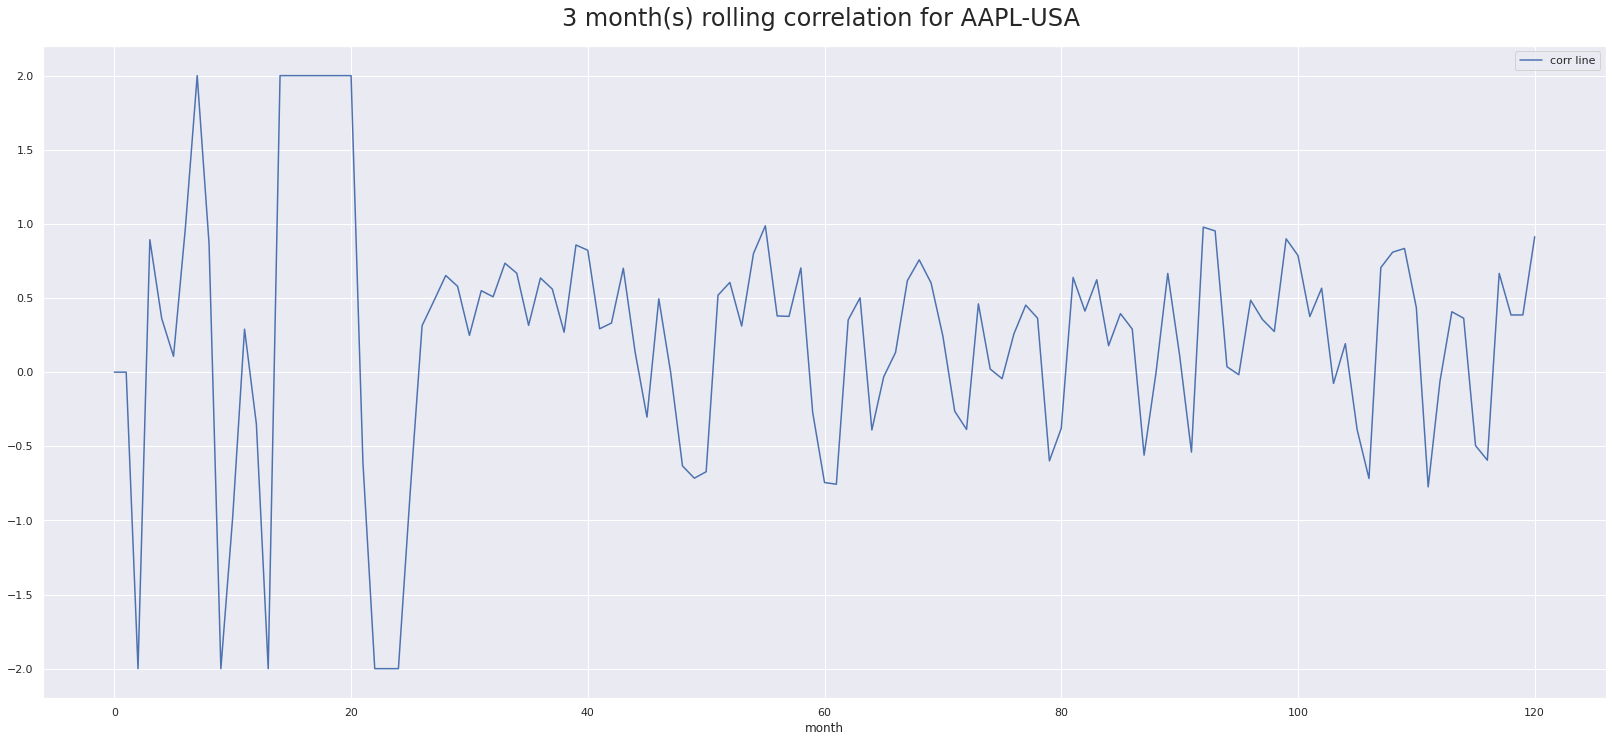

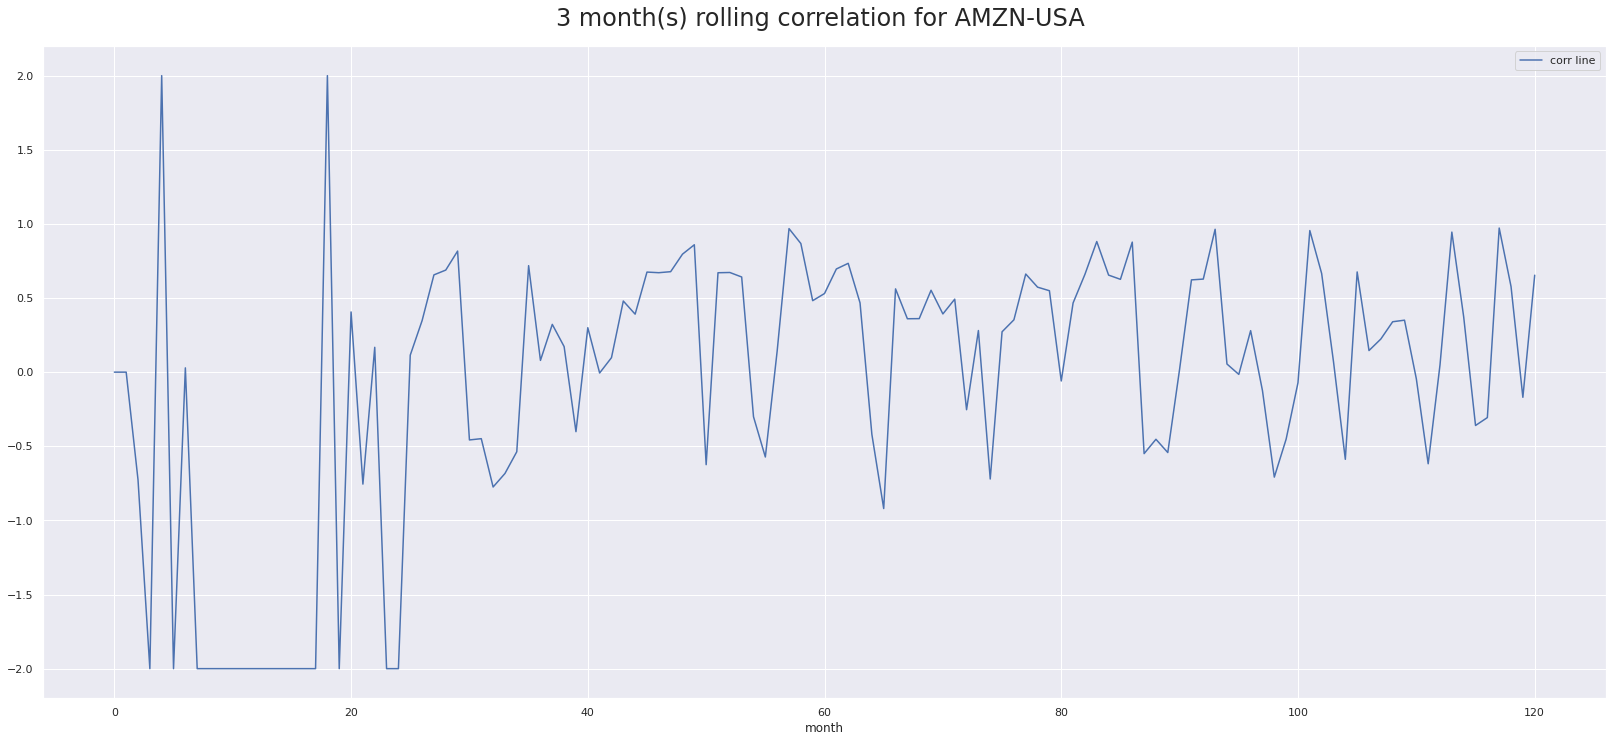

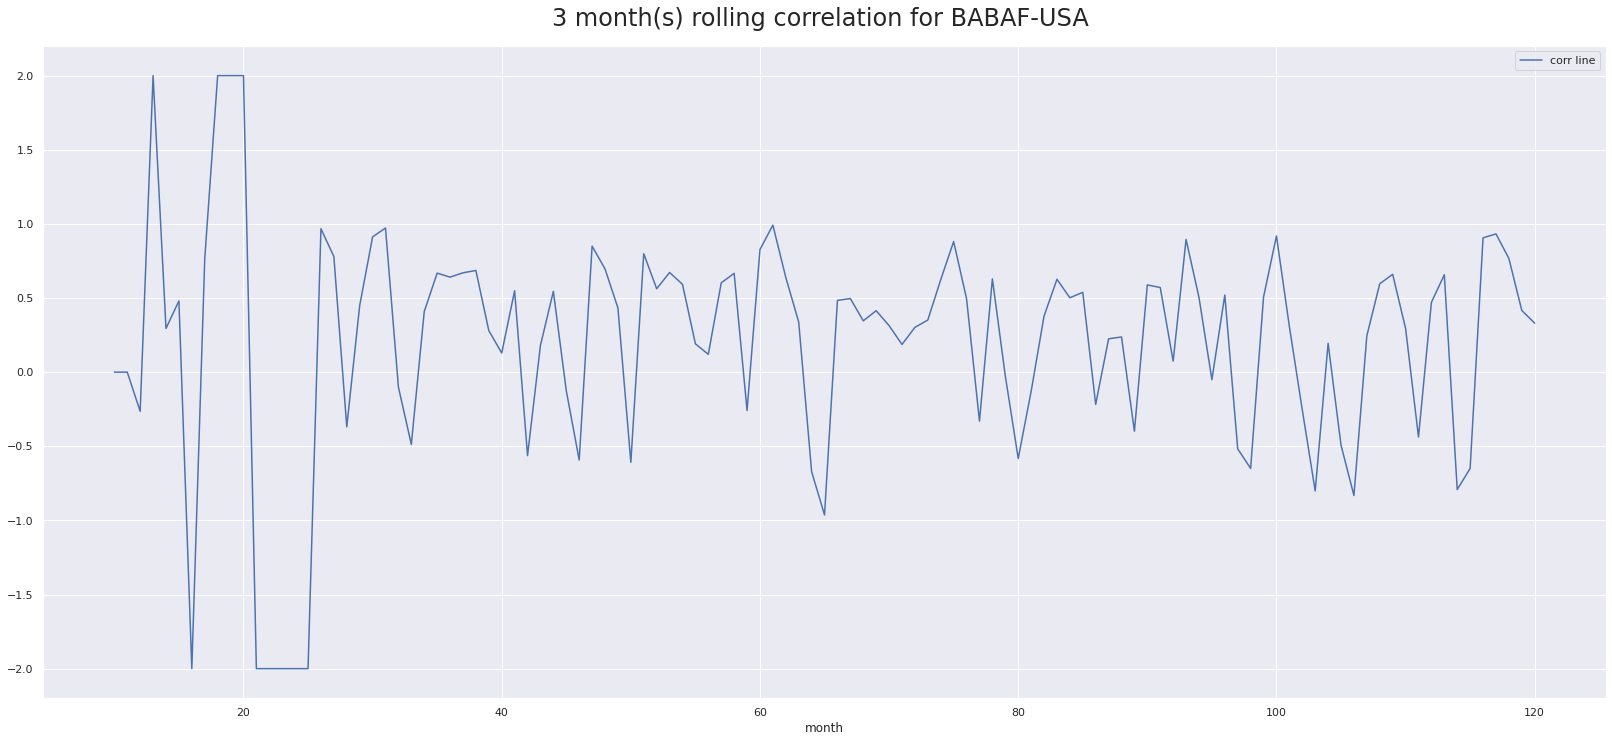

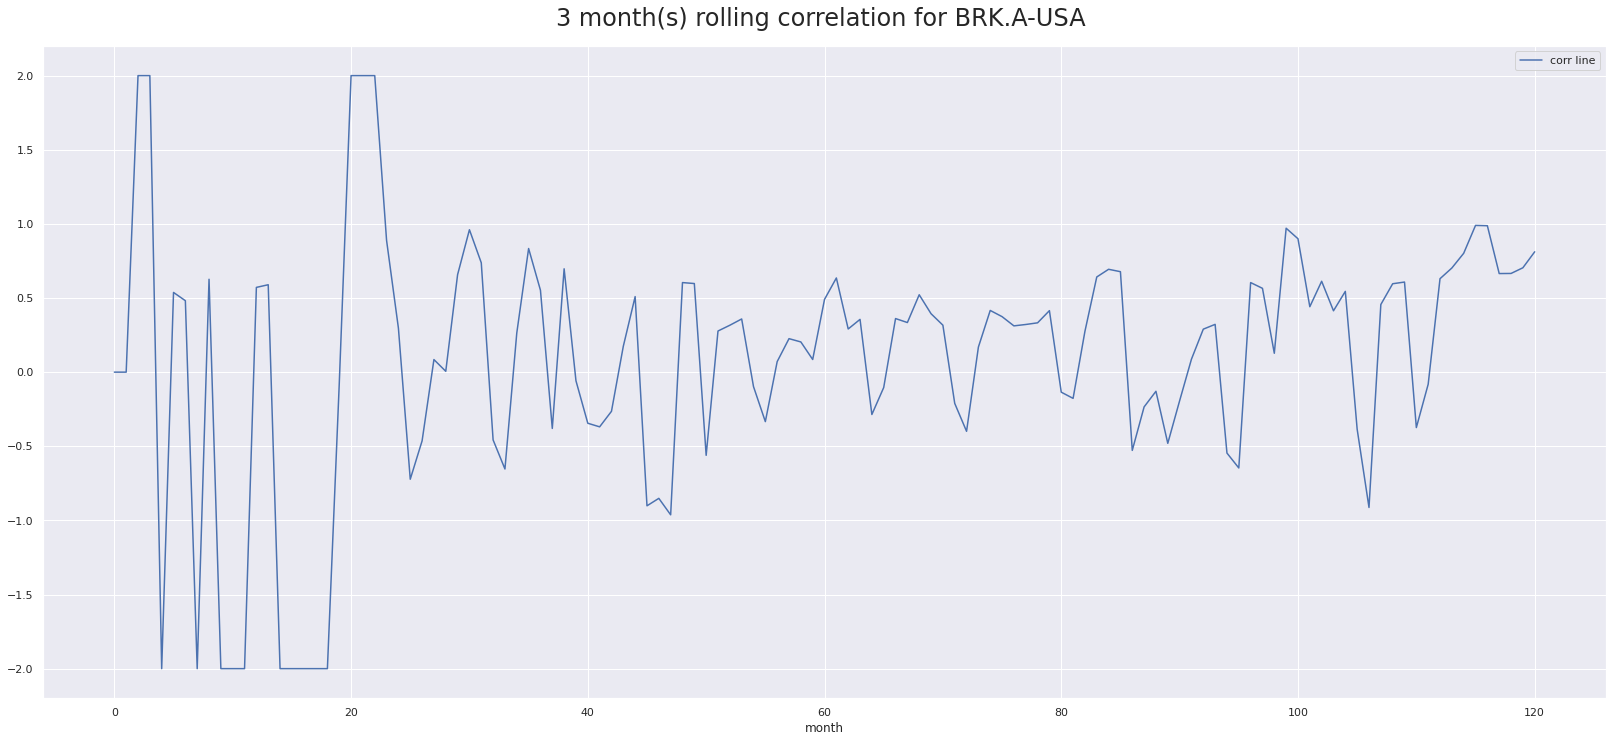

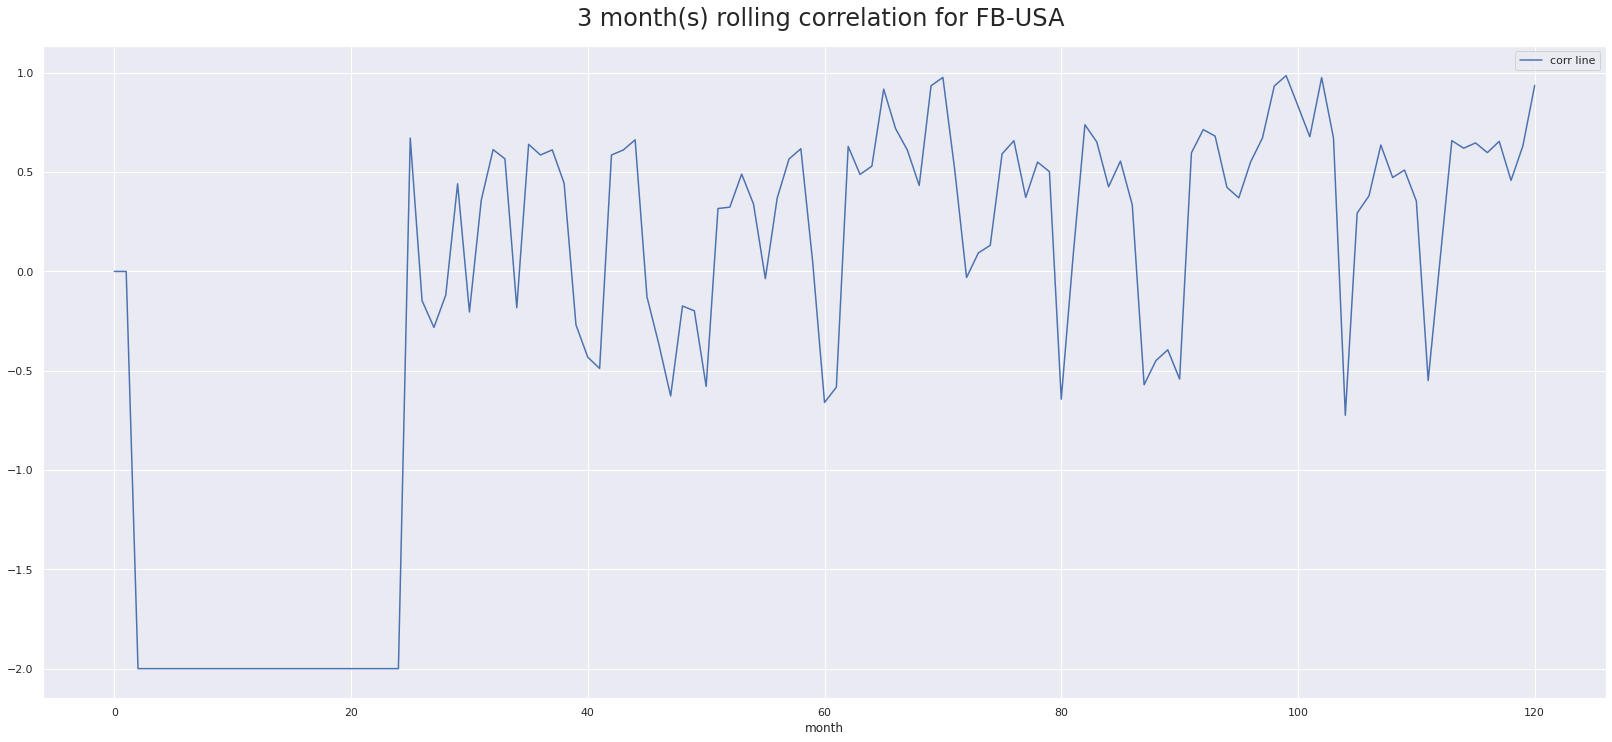

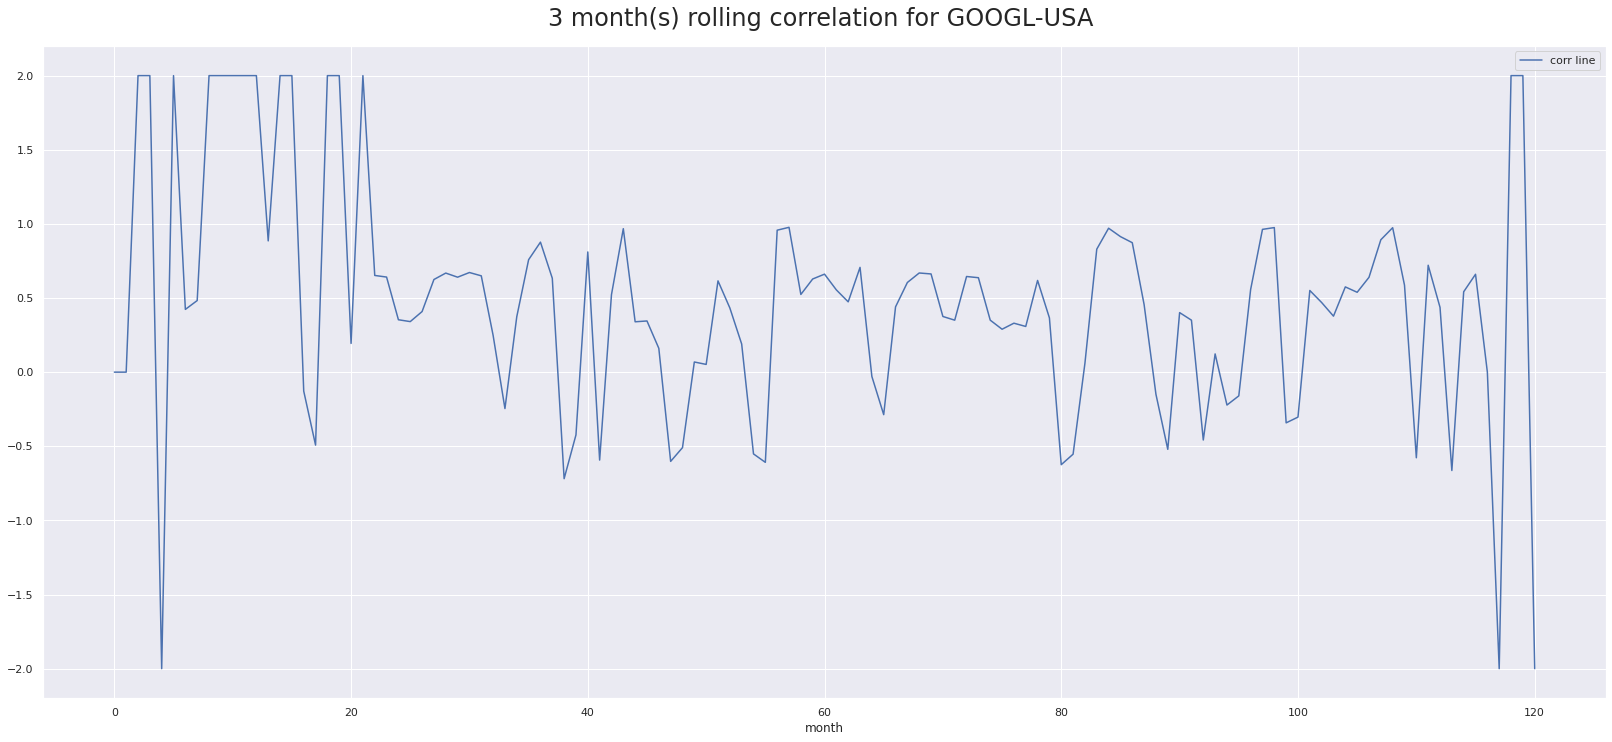

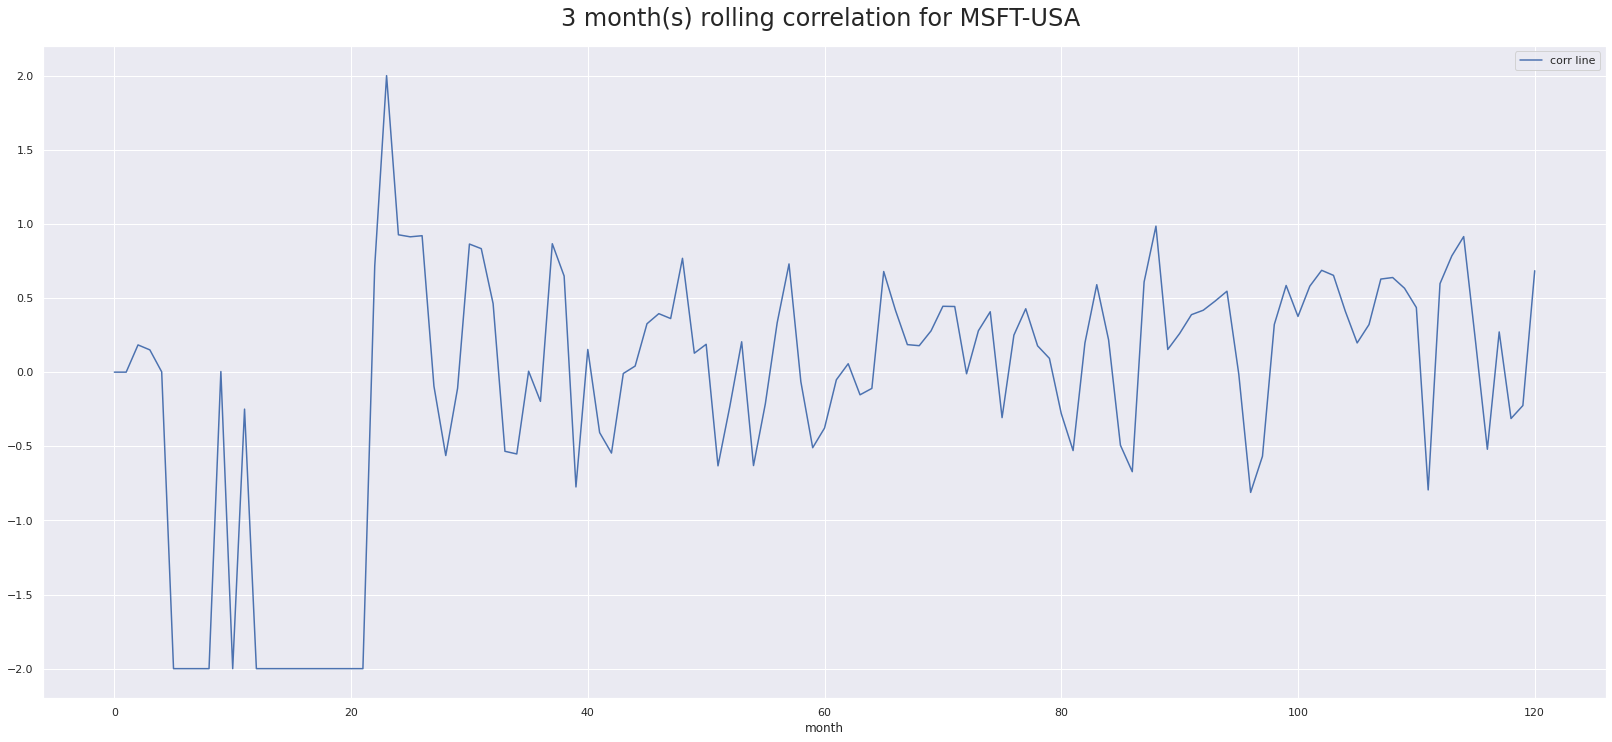

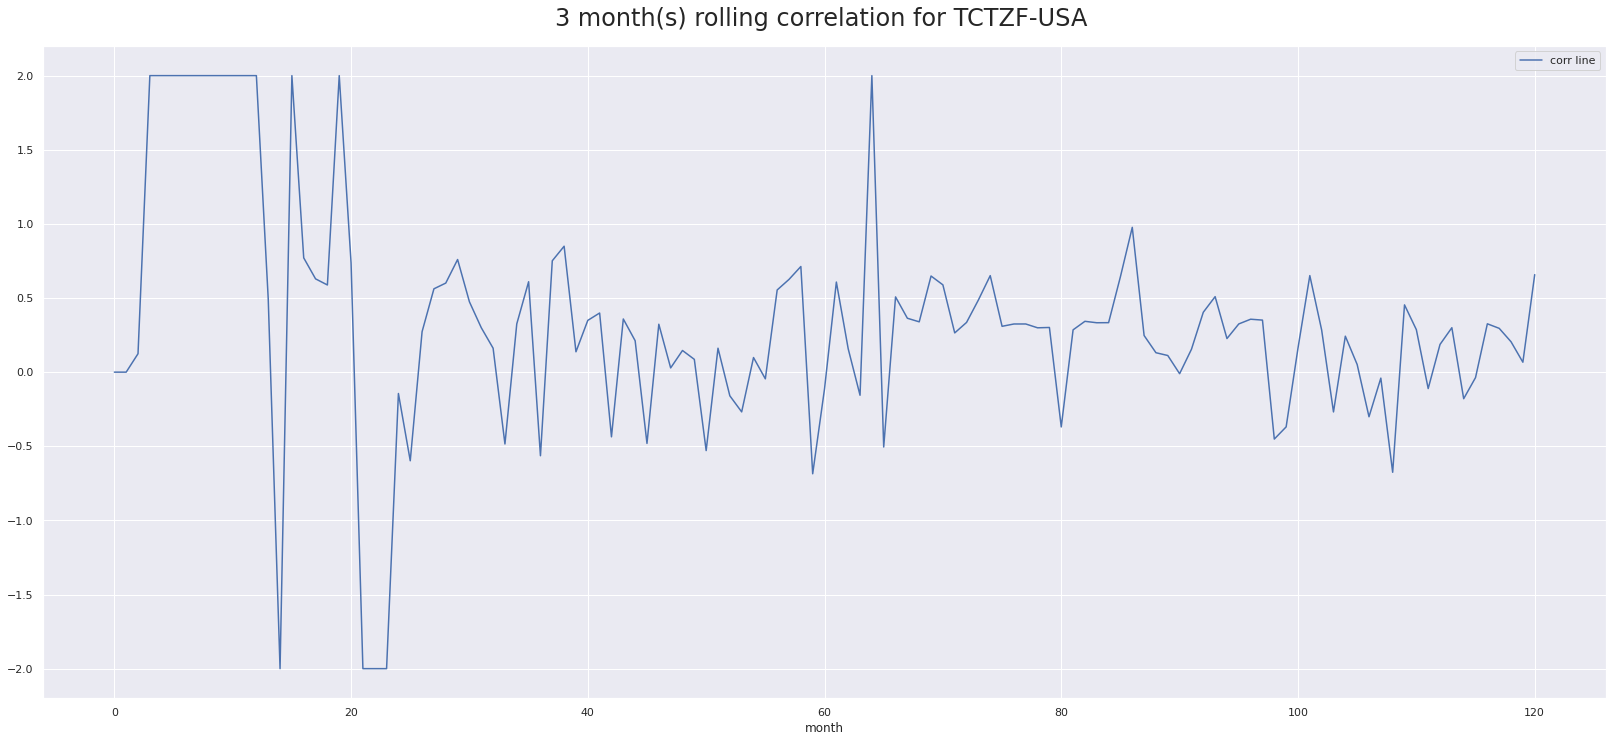

In [186]:
#1 Function
try:
  dataset = pd.merge(price_df, metric_df, on=['ticker_exchange','date'], how='inner')
except Exception as e:
  print("Error in merge!\n",e)

def plot_rolling_corr(dataset, roll_months=3) -> pd.DataFrame:
  '''This function requires a set of columns to produce the right output ['ticker_exchange','date','ebit_ntm','sales_ntm','ebitda_ntm','tax_rate','gross_inc_ntm','price'], the two arguments here are data and window'''
  assert roll_months >=3, 'roll_months must be > or = 3'
  # Cast to datetime
  dataset['date'] = pd.to_datetime(dataset['date'],dayfirst=True)
  # Sort by ticker and then by date 
  dataset.sort_values(['ticker_exchange', 'date'], axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last', ignore_index=False, key=None)
  dataset.reset_index(inplace=True)
  dataset.drop('index', inplace=True, axis = 1)
  # interpolate using groupby so data from different companies is grouped and also previously sorted in asc order of dates 
  temp = dataset.groupby(by = 'ticker_exchange', axis = 0)
  keys = list(temp.groups.keys())
  # fill original dataframe with interpolated values for this interpolation we use groups of company to calculate missing values thus values from one company will not be considered for another company's interpolation 
  for key in keys: #Loop used for interpolation within groups
    dataset.iloc[temp.get_group(key).index] = temp.get_group(key).interpolate(method='linear',limit_direction='both')
  # create gross_margin_ntm
  dataset['gross_margin_ntm'] = dataset['gross_inc_ntm'] / dataset['sales_ntm']
  # keep a track of start date to calculate months since that date
  min_date = dataset['date'].min() # keep a check of the lowest date in the dataset the following calculations avoid rounding errors
  dataset['month']= (dataset['date'].dt.year - min_date.year)*12 + (dataset['date'].dt.month - min_date.month) #Date to month number since min date
  price = dataset.pop('price')
  dataset['price'] = price #shifts price to the last column
  dataset.dropna(axis=0, inplace=True)
  # update groups 
  temp = dataset.groupby(by = 'ticker_exchange', axis = 0)
  # group length vs roll validation
  if len(keys)!= len(list(temp.groups.keys())):
    print('[!] NaN values found after interpolation were dropped causing some keys as a whole to be dropped')
    print('---------------------------- Dropped Keys------------------------------------------------')
    print(list(set(keys)- set(temp.groups.keys())))
    print('-----------------------------------------------------------------------------------------')
    print('Window = '+str(roll_months)+ ' month(s)')
    print('Warning! +inf and -inf values encountered replaced with +2 and -2 respectively')
  colnames = [i for i in dataset.columns if i not in ['ticker_exchange','month','date']]
  df = dataset.groupby('ticker_exchange', axis=0)[colnames].rolling(roll_months).corr()
  df.drop(df.index.get_level_values(2)[-1],level=2, inplace=True)
  dataset['rolling_corr'] = df.mean(axis =0, level=1)['price'].fillna(0)
  dataset.replace(np.inf,2,inplace=True)
  dataset.replace(np.NINF,-2,inplace=True)
  print('-----------------------------------------------------------------------------------------')
  ax = dataset.groupby(by = 'ticker_exchange', axis = 0).plot( x = 'month',y='rolling_corr', sharex=True, figsize=(28,12), label='corr line')
  #loop for adding title etc
  j=0
  for i in ax:
      i.set_title("{} month(s) rolling correlation for {} ".format(roll_months, keys[j]), pad = 20, fontdict={'fontsize':24})
      j+=1
  return None

plot_rolling_corr(dataset, 3)